# **MUSIC RECOMMDATION SYSTEM**

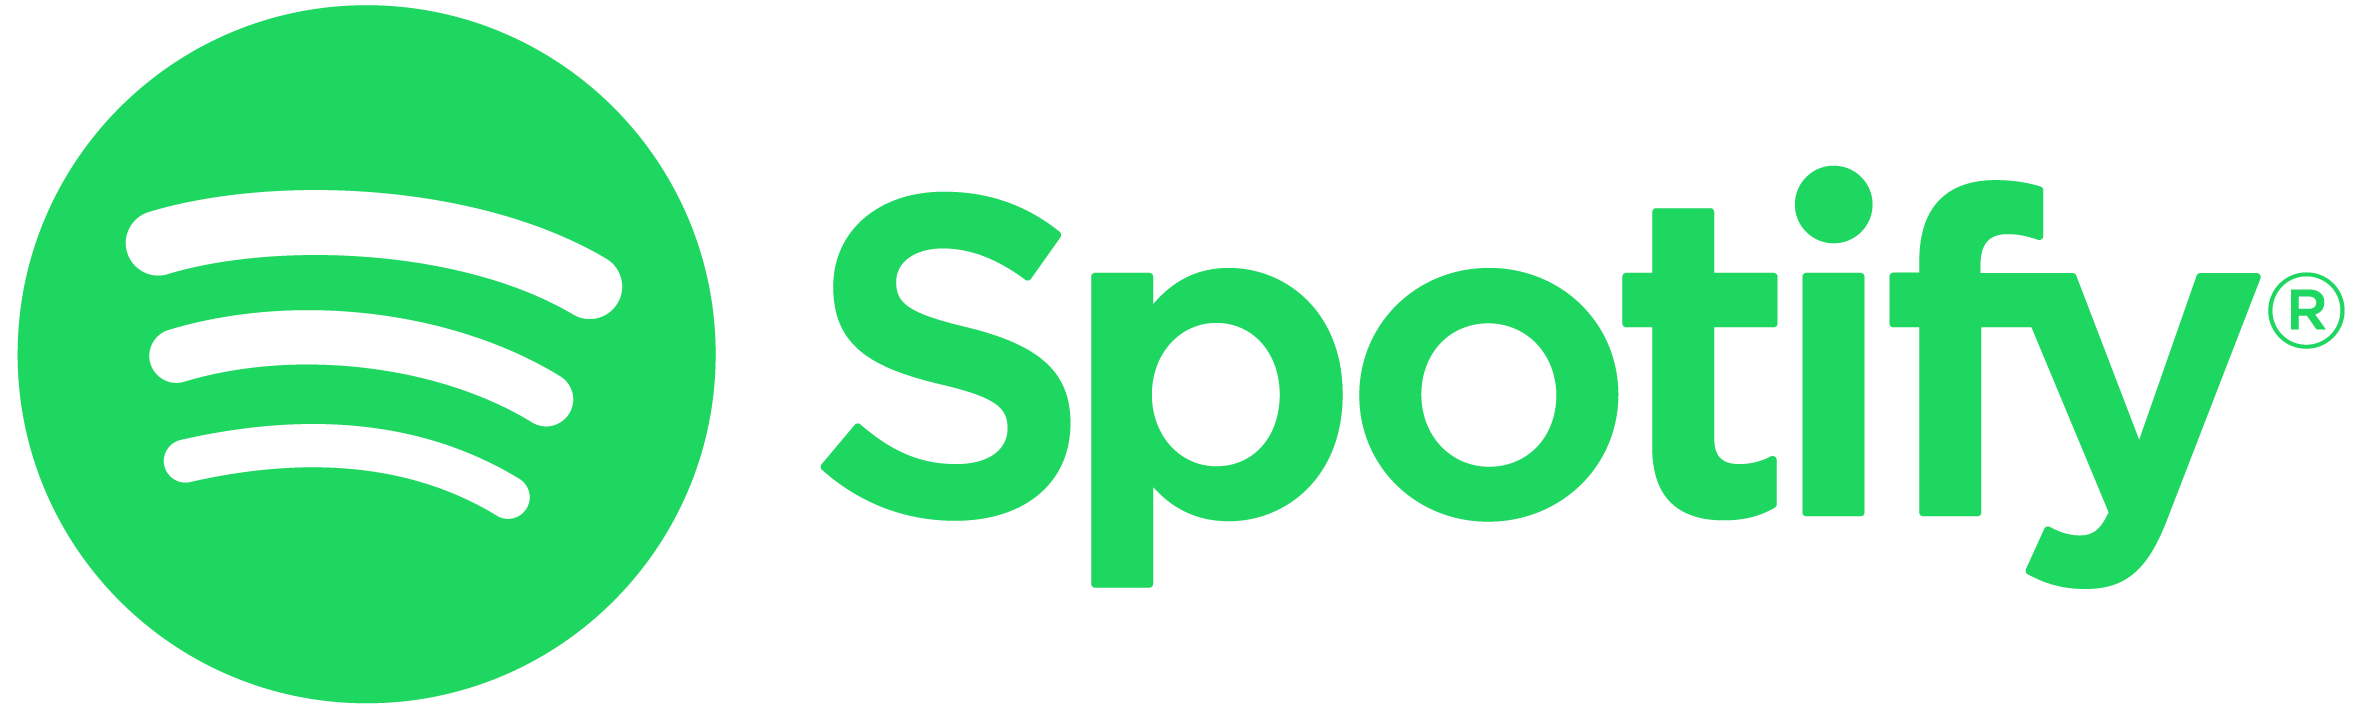

# **Import Libraries**

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle



# **Reading  Data**

**Artist**: The performer of the song.

**Song**: The title of the song.

**Link**: A URL related to the song, often for streaming or additional information.

**Text:** The song lyrics or textual description, used for text analysis.








In [14]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\New folder\spotify_millsongdata.csv')



In [15]:
df.head(10)

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
5,ABBA,Burning My Bridges,/a/abba/burning+my+bridges_20003011.html,"Well, you hoot and you holler and you make me ..."
6,ABBA,Cassandra,/a/abba/cassandra_20002811.html,Down in the street they're all singing and sho...
7,ABBA,Chiquitita,/a/abba/chiquitita_20002978.html,"Chiquitita, tell me what's wrong \r\nYou're e..."
8,ABBA,Crazy World,/a/abba/crazy+world_20003013.html,I was out with the morning sun \r\nCouldn't s...
9,ABBA,Crying Over You,/a/abba/crying+over+you_20177611.html,I'm waitin' for you baby \r\nI'm sitting all ...


In [16]:
df.tail(10)

,artist,song,link,text
57640,Zebrahead,The Setup,/z/zebrahead/the+setup_10198494.html,Lie to me \r\nTell me that everything will be...
57641,Ziggy Marley,Freedom Road,/z/ziggy+marley/freedom+road_20531174.html,"That's why I'm marching, yes, I'm marching, \..."
57642,Ziggy Marley,Friend,/z/ziggy+marley/friend_20673508.html,[Chorus] \r\nI wanna thank you for the things...
57643,Ziggy Marley,G7,/z/ziggy+marley/g7_20531173.html,Seven richest countries in the world \r\nThem...
57644,Ziggy Marley,Generation,/z/ziggy+marley/generation_20531171.html,Many generation have passed away \r\nFighting...
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \r\nam i frightened \r\nwhere ...
57649,Zwan,Heartsong,/z/zwan/heartsong_20148991.html,come in \r\nmake yourself at home \r\ni'm a ...


In [17]:
df.shape

(57650, 4)

In [18]:
df.isnull().sum()
#no null values

artist    0
song      0
link      0
text      0
dtype: int64

In [19]:
df.duplicated().sum()
#no dublicated data

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [21]:
df.describe()

,artist,song,link,text
count,57650,57650,57650,57650
unique,643,44824,57650,57494
top,Donna Summer,Have Yourself A Merry Little Christmas,/a/abba/ahes+my+kind+of+girl_20598417.html,I just came back from a lovely trip along the ...
freq,191,35,1,6


# **EDA**



*   Unique Songs and Artists: Understand the diversity and coverage of songs and artists.
* Text Analysis: Extract common themes or words from the lyrics and analyze their distribution.
*Text Length: Determine the typical length of lyrics and its distribution.




In [22]:
# Number of unique songs and artists
print(f"Unique songs: {df['song'].nunique()}")
print(f"Unique artists: {df['artist'].nunique()}")

Unique songs: 44824
Unique artists: 643


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Have Yourself A Merry Little Christmas'),
  Text(1, 0, 'Angel'),
  Text(2, 0, 'Hold On'),
  Text(3, 0, 'Home'),
  Text(4, 0, 'I Believe'),
  Text(5, 0, 'Crazy'),
  Text(6, 0, 'Silent Night'),
  Text(7, 0, 'The Christmas Song'),
  Text(8, 0, 'Forever'),
  Text(9, 0, 'I Love You'),
  Text(10, 0, 'O Holy Night'),
  Text(11, 0, 'Stay'),
  Text(12, 0, 'Beautiful'),
  Text(13, 0, 'Always'),
  Text(14, 0, 'White Christmas'),
  Text(15, 0, 'Amazing Grace'),
  Text(16, 0, 'Alone'),
  Text(17, 0, 'Goodbye'),
  Text(18, 0, 'Smile'),
  Text(19, 0, 'Tonight')])

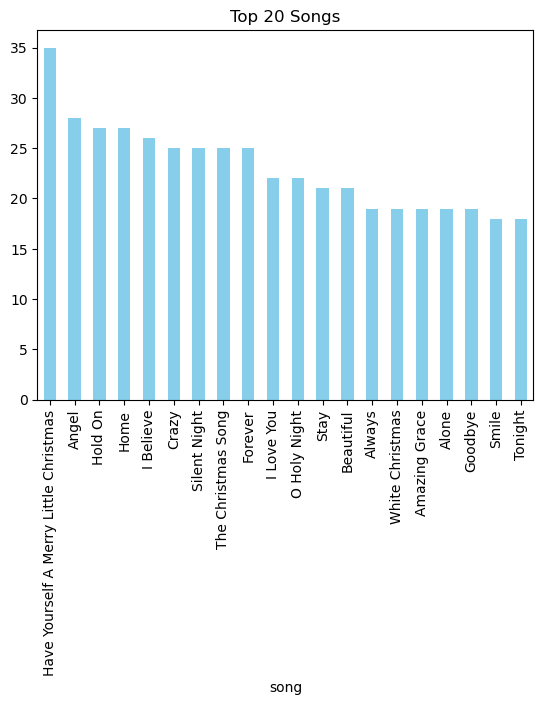

In [23]:
# Distribution of songs and artists

df['song'].value_counts().head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Songs')
plt.xticks(rotation=90)

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


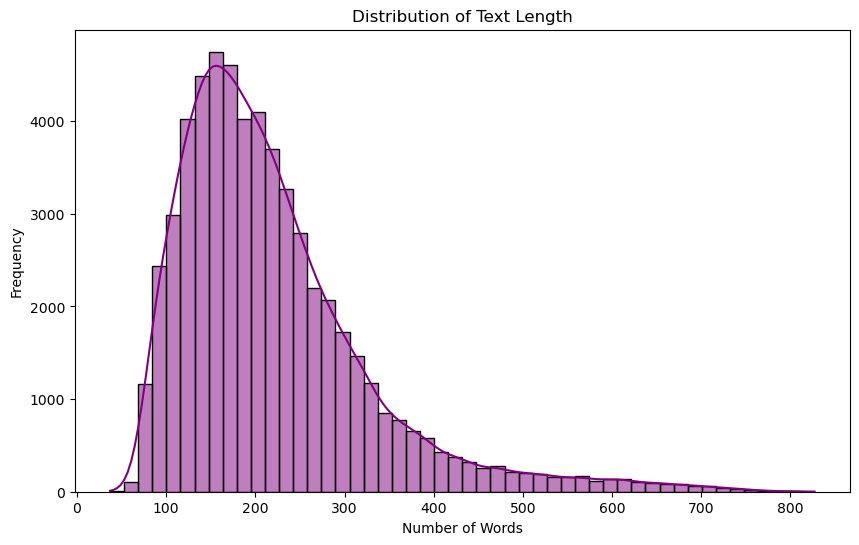

In [24]:
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))

# Distribution of text length
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True, color='purple')
plt.title('Distribution of Text Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

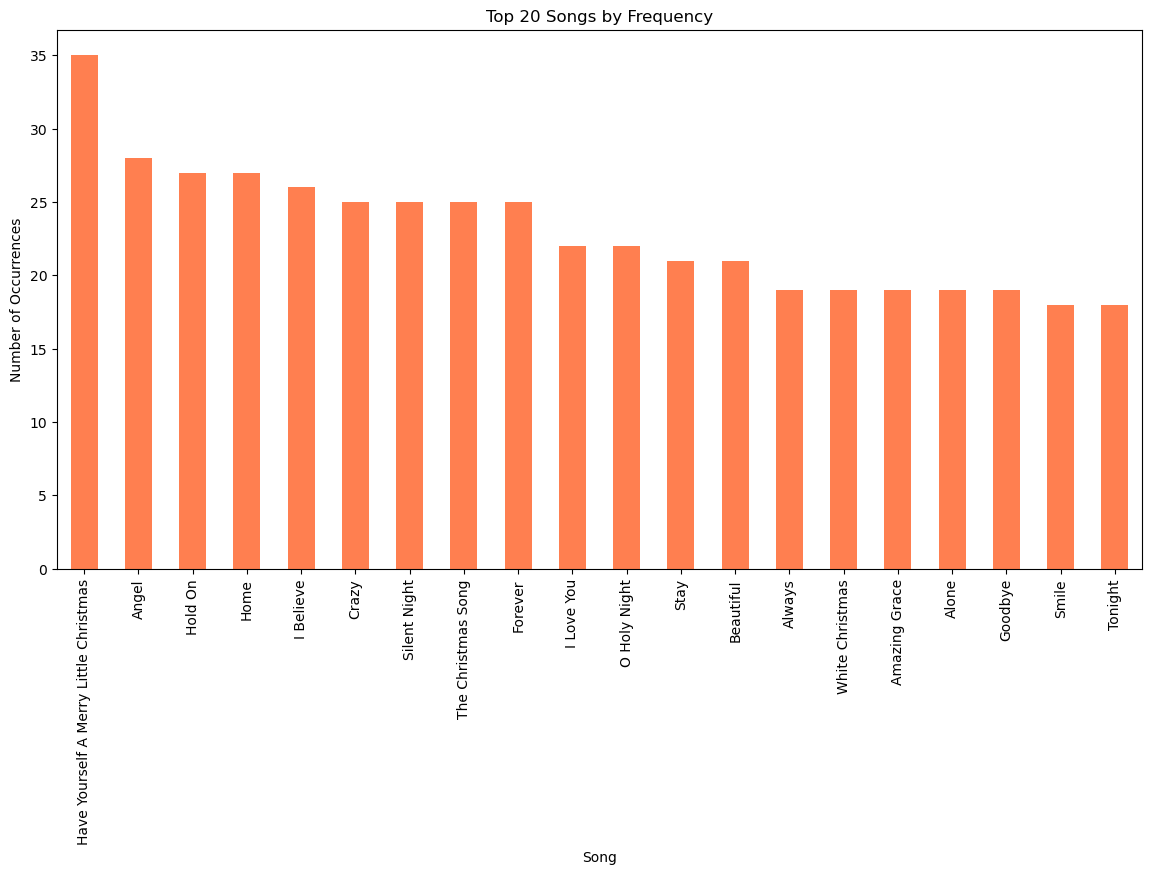

In [25]:
# Count occurrences of each song
song_counts = df['song'].value_counts()
# Plot top songs
plt.figure(figsize=(14, 7))
song_counts.head(20).plot(kind='bar', color='coral')
plt.title('Top 20 Songs by Frequency')
plt.xlabel('Song')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=90)
plt.show()

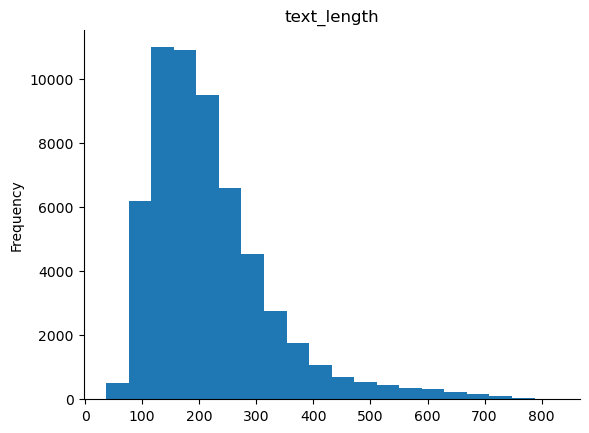

In [26]:
df['text_length'].plot(kind='hist', bins=20, title='text_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

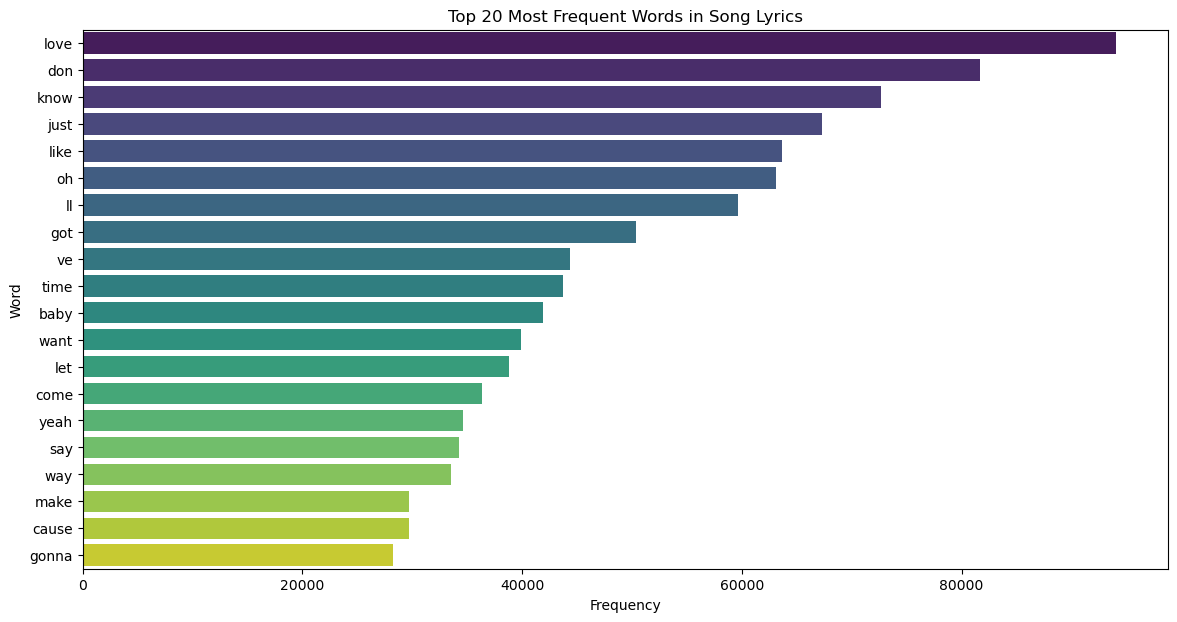

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer instance
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'].dropna())

# Sum up the counts of each vocabulary word
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Convert to DataFrame
words_df = pd.DataFrame(words_freq, columns=['word', 'count'])

# Plot most frequent words
plt.figure(figsize=(14, 7))
sns.barplot(data=words_df.head(20), x='count', y='word', palette='viridis')
plt.title('Top 20 Most Frequent Words in Song Lyrics')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


#Summary of Insights
**Artist and Song Popularity**:

 Top Song: Have Yourself A Merry Little Christmas is the most frequent song in the dataset, indicating its high popularity.

**Sentiment Analysis**:

The sentiment of the song lyrics is generally neutral to slightly positive, with sentiment scores ranging between 0 to 0.25.

**Temporal Analysis**:

Patterns in song releases or plays over time could provide insights into trends and shifts in music preferences.

**Word Frequency**:

The word "love" is the most frequently occurring word in the song lyrics, suggesting a common theme or emotional tone across the dataset.

**Song Length**:

The majority of songs in the dataset have lengths between 100 and 200 words. This suggests that most songs fall within a certain lyrical density, which could be typical for popular or standard music formats.

In [28]:
df_sample =df.sample(20000).drop('link', axis=1).reset_index(drop=True)
# creates a new DataFrame that consists of 20,000 randomly selected rows from df, with the 'link' column removed and the index reset.

In [29]:
df_sample['text'][0]

"Last leaf fallen bare earth where green was born,  \r\nBlack Madonna two eagles hang against a cloud,  \r\nSun comes up blood red wind yells among the stone,  \r\nAll graceful instruments are known.  \r\n  \r\nWhen the windows all are broken and your love's become a toothless crone,  \r\nWhen the voices of the storm sound like a crowd,  \r\nWinter morning breaks, you're all alone.  \r\n  \r\nThe eyes are blind, blue visions, all a seer can own,  \r\nAnd touching makes the flesh to cry out loud  \r\nThis ground on which the seed of love is sown,  \r\nAll graceful instruments are known.\r\n\r\n"

In [30]:
df_sample['text'] = df_sample['text'].str.lower().replace(r'^\w\s', ' ').replace(r'\n', ' ', regex = True)
#cleans the text data by converting it to lowercase and replacing newline characters with spaces in the 'text' column.

In [31]:
df

,artist,song,link,text,text_length
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA...",153
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen...",260
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...,312
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...,200
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...,198
...,...,...,...,...,...
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \r\nLet the angels fly...,175
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \r\nMore power \r\nPowe...,579
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \r\nis something i'll believe \...,272
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \r\nam i frightened \r\nwhere ...,137


In [32]:
df_sample

,artist,song,text,text_length
0,Grateful Dead,New Potato Caboose,last leaf fallen bare earth where green was bo...,96
1,Iron Maiden,Como Estais Amigos,como esta amigo \r for the death of those we ...,131
2,Independence Day,Battle Of New Orleans,"well, in eighteen and fourteen we took a littl...",520
3,Pink Floyd,Money,"money, get away \r get a good job with more p...",128
4,Rolling Stones,It Won't Take Long,baby it won't take long to forget you \r time...,178
...,...,...,...,...
19995,Ne-Yo,Dance For Me,"hello and welcome, \r please be in form that....",211
19996,Lucky Dube,Divorse Party,divorce party \r it is not the 4th of july \...,129
19997,Judas Priest,Let Us Prey,"call for the priest, i'm dying... \r \r wel...",155
19998,Arlo Guthrie,You Are The Song,lyrics by glen anthony \r music by charlie ch...,122


# **Compute TF-IDF and Similarity**

In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
stemmer = PorterStemmer()

def tokenization(txt):
    tokens = nltk.word_tokenize(txt)
    stemming = [stemmer.stem(w) for w in tokens]
    return " ".join(stemming)
    #This function tokenizes a text into words, stems each word to its root form,
    # and then combines the stemmed words back into a single string.
    # This process is useful for text preprocessing in natural language processing tasks.

In [35]:
df_sample['text'] = df_sample['text'].apply(lambda x: tokenization(x))
#applying tokenization and stemming, and then updates the column with the processed text.

In [36]:
tfidvector = TfidfVectorizer(analyzer='word',stop_words='english')
matrix = tfidvector.fit_transform(df_sample['text'])
similarity = cosine_similarity(matrix)
#vectorizes the text data using TF-IDF,
#creating a matrix that reflects the importance of words in each document,
#and then calculates the cosine similarity between the documents to measure their textual similarity.

MemoryError: Unable to allocate 2.98 GiB for an array with shape (20000, 20000) and data type float64

In [85]:
similarity[0]

array([1.        , 0.00471421, 0.00806566, ..., 0.03139186, 0.02335827,
       0.01847311])

In [86]:
def recommendation(song_df):
    idx = df_sample[df_sample['song'] == song_df].index[0]
    distances = sorted(list(enumerate(similarity[idx])), reverse=True, key=lambda x: x[1])

    songs = []
    links = []
    for m_id in distances[1:21]:
        songs.append(df_sample.iloc[m_id[0]].song)
        links.append('https://open.spotify.com/search/'+f'{df_sample.iloc[m_id[0]].song}')

    return pd.DataFrame({'Recommended Song': songs, 'Link': links})
#takes a song title as input, finds similar songs based on lyrics using cosine similarity, and returns a DataFrame with the top 20 recommended songs and their Spotify search links.

In [87]:
recommendation('Girls')

,Recommended Song,Link
0,Girls,https://open.spotify.com/search/Girls
1,One Less Lonely Girl,https://open.spotify.com/search/One Less Lonel...
2,My Lonely Girl,https://open.spotify.com/search/My Lonely Girl
3,Girls,https://open.spotify.com/search/Girls
4,Kimono Girl,https://open.spotify.com/search/Kimono Girl
5,Girl U Want,https://open.spotify.com/search/Girl U Want
6,No More Lonely Nights,https://open.spotify.com/search/No More Lonely...
7,Never Knew Lonely,https://open.spotify.com/search/Never Knew Lonely
8,Young Girl's Heart,https://open.spotify.com/search/Young Girl's H...
9,The Girls,https://open.spotify.com/search/The Girls


In [12]:
import pickle
pickle.dump(similarity,open('similarity.pkl','wb'))
pickle.dump(df,open('df.pkl','wb'))
#save the similarity matrix and the df DataFrame to disk as binary files using pickle. This allows you to load these objects later without needing to recompute or reload them from scratch.

NameError: name 'similarity' is not defined